In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# from tensorflow import keras
import sklearn
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, \
        GradientBoostingClassifier, StackingClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier

from sklearn.preprocessing import label_binarize
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.model_selection import cross_validate
from mlxtend.plotting import plot_learning_curves
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.metrics import confusion_matrix
import seaborn as sns

from sklearn.model_selection import train_test_split

import scikitplot as skplt


In [2]:
# Loads full model
model = tf.keras.models.load_model('model_trained_sound_10.hdf5')

In [3]:
src = '../CSML1020-Group_5-Project-UrbanSound-8K/output'
validation_dir = src + '/test'
batch_size = 20

test_datagen = ImageDataGenerator(rescale=1. / 255)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    batch_size=batch_size,
    shuffle=False,
    class_mode='categorical')

Found 1572 images belonging to 10 classes.


In [4]:
y_predictions = model.predict(validation_generator)
class_predictions = np.argmax(y_predictions, axis = 1) #doesn't work I think, getting really poor results

In [5]:
len(class_predictions)

1572

In [6]:
class_predictions

array([0, 0, 0, ..., 9, 9, 2])

In [7]:
labels = (validation_generator.class_indices)
labels

{'air_conditioner': 0,
 'car_horn': 1,
 'children_playing': 2,
 'dog_bark': 3,
 'drilling': 4,
 'engine_idling': 5,
 'gun_shot': 6,
 'jackhammer': 7,
 'siren': 8,
 'street_music': 9}

In [8]:
#x1, y1 = validation_generator.next()
#print(y1)
y_test = validation_generator.classes

In [9]:
y_test

array([0, 0, 0, ..., 9, 9, 9], dtype=int32)

In [10]:
len(y_test)

1572

Accuracy: 0.8352417302798982
Precision: 0.8394348693899663
Recall: 0.8474205871045827
f1_score: 0.8422232270973998
confusion_matrix
[[177   1   1   1   1   2   0   0   0  13]
 [  0  70   0   0   0   1   0   0   0   1]
 [  5   1 119  19   6  12   4   3   3  10]
 [  1   0  13 136   4   3   2   0   7   2]
 [  2   2   9   3 148   2   0  11   0   5]
 [  0   0   4   2   0 160   0   0   0   5]
 [  1   0   3   1   1   1  60   0   0   0]
 [  0   1   1   1   6   5   0 172   0   3]
 [  0   2   3   8   5   1   0   0 129   6]
 [  8   6  11   3   8   7   1   3   2 142]]
roc_auc_score: 0.979390791237806


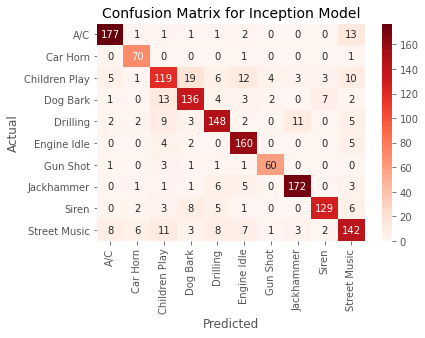

In [11]:
df_metrics = pd.DataFrame(columns=['accuracy', 'precision', 'recall', 'f1_score', 'confusion_matrix', 'roc_auc_score'])

accuracy_score = sklearn.metrics.accuracy_score(y_test, class_predictions)
precision_score = sklearn.metrics.precision_score(y_test, class_predictions, average='macro')
recall_score = sklearn.metrics.recall_score(y_test, class_predictions, average='macro')
f1_score = sklearn.metrics.f1_score(y_test, class_predictions, average='macro')
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, class_predictions)
roc_auc_score = sklearn.metrics.roc_auc_score(y_test, y_predictions, multi_class='ovr')
#fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, class_predictions) #doesn't do multiclass

print("Accuracy: " + str(accuracy_score))
print("Precision: "+ str(precision_score))
print("Recall: " + str(recall_score))
print("f1_score: " + str(f1_score))
print("confusion_matrix")
print(confusion_matrix)
print('roc_auc_score: ' + str(roc_auc_score))

#print("fpr: " + fpr)
#print("tpr: " + tpr)
#print("thresholds: " + thresholds)

#generate roc curve

df_metrics = df_metrics.append({
    'accuracy': accuracy_score, 
    'precision': precision_score,
    'recall': recall_score,
    'f1_score': f1_score,
    'confusion_matrix': confusion_matrix,
    'roc_auc_score': roc_auc_score
}, ignore_index=True)

CLASSES = ['A/C', 'Car Horn', 'Children Play', 'Dog Bark',
       'Drilling', 'Engine Idle', 'Gun Shot', 'Jackhammer',
       'Siren', 'Street Music']
#cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_test_pred[i], axis=1))
cm_df = pd.DataFrame(confusion_matrix, index = CLASSES, columns = CLASSES)
cm_df.index.name = 'Actual'
cm_df.columns.name = 'Predicted'
plt.title('Confusion Matrix for Inception Model', fontsize=14)
sns.heatmap(cm_df, annot=True, fmt='.6g', annot_kws={"size": 10}, cmap='Reds')
plt.show()
    

In [12]:
df_metrics.to_csv('./output/nn-results/nn-inception_results.csv')

In [13]:
accuracies_by_class = confusion_matrix.diagonal()/confusion_matrix.sum(axis=1)
accuracies_by_class

array([0.90306122, 0.97222222, 0.65384615, 0.80952381, 0.81318681,
       0.93567251, 0.89552239, 0.91005291, 0.83766234, 0.7434555 ])

In [14]:
df_accuracy_by_class = pd.DataFrame(columns=[
    'class',
    'accuracy_score'
])
    
df_accuracy_by_class = df_accuracy_by_class.append({
    "class": "Accuracy - A/C",
    "accuracy_score": accuracies_by_class[0]
 }, ignore_index=True)

df_accuracy_by_class = df_accuracy_by_class.append({
    "class": "Accuracy - Car Horn",
    "accuracy_score": accuracies_by_class[1]
 }, ignore_index=True)

df_accuracy_by_class = df_accuracy_by_class.append({
    "class": "Accuracy - Children Play",
    "accuracy_score": accuracies_by_class[2]
 }, ignore_index=True)

df_accuracy_by_class = df_accuracy_by_class.append({
    "class": "Accuracy - Dog Bark",
    "accuracy_score": accuracies_by_class[3]
 }, ignore_index=True)

df_accuracy_by_class = df_accuracy_by_class.append({
    "class": "Accuracy - Drilling",
    "accuracy_score": accuracies_by_class[4]
 }, ignore_index=True)

df_accuracy_by_class = df_accuracy_by_class.append({
    "class": "Accuracy - Engine Idle",
    "accuracy_score": accuracies_by_class[5]
 }, ignore_index=True)

df_accuracy_by_class = df_accuracy_by_class.append({
    "class": "Accuracy - Gun Shot",
    "accuracy_score": accuracies_by_class[6]
 }, ignore_index=True)

df_accuracy_by_class = df_accuracy_by_class.append({
    "class": "Accuracy - Jackhammer",
    "accuracy_score": accuracies_by_class[7]
 }, ignore_index=True)

df_accuracy_by_class = df_accuracy_by_class.append({
    "class": "Accuracy - Siren",
    "accuracy_score": accuracies_by_class[8]
 }, ignore_index=True)

df_accuracy_by_class = df_accuracy_by_class.append({
    "class": "Accuracy - Street Music",
    "accuracy_score": accuracies_by_class[9]
 }, ignore_index=True)

In [15]:
df_accuracy_by_class

,class,accuracy_score
0,Accuracy - A/C,0.903061
1,Accuracy - Car Horn,0.972222
2,Accuracy - Children Play,0.653846
3,Accuracy - Dog Bark,0.809524
4,Accuracy - Drilling,0.813187
5,Accuracy - Engine Idle,0.935673
6,Accuracy - Gun Shot,0.895522
7,Accuracy - Jackhammer,0.910053
8,Accuracy - Siren,0.837662
9,Accuracy - Street Music,0.743455


In [16]:
df_accuracy_by_class.to_csv('./output/nn-results/nn-inception_class_accuracies.csv')